<a href="https://colab.research.google.com/github/oprostep/2023-fall_LP/blob/main/231119_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. 전처리**

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### from sklearn.neighbors import KNeighborsClassifier

Url="https://raw.githubusercontent.com/oprostep/2023-fall_LP/main/heart.csv"

### 자료 불러서 df라고 하자.

df = pd.read_csv(Url)

### 자료가 어떻게 생겼나?
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Attribute Information:

* Diagnosis (M = malignant, B = benign)



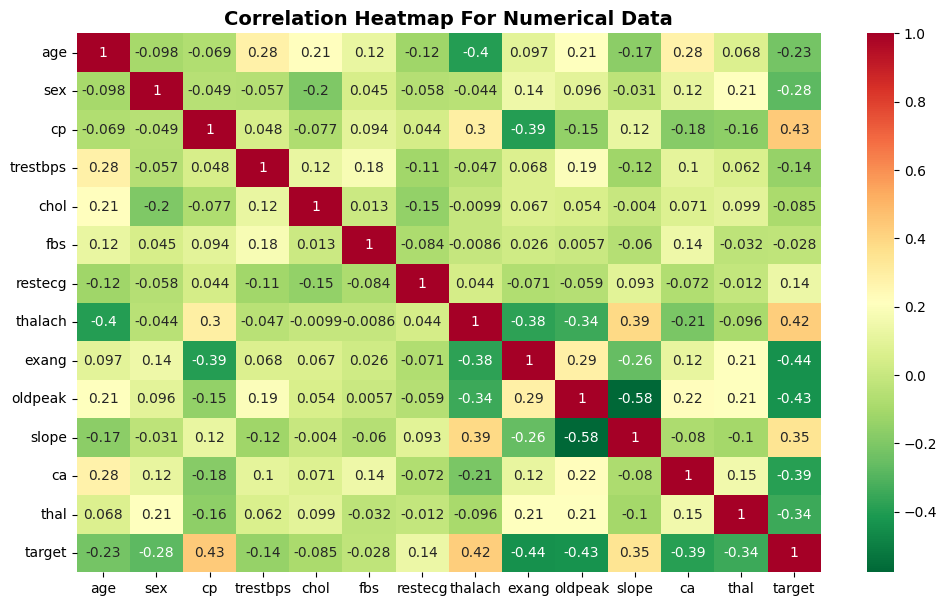

In [103]:
con_cols = [x for x in df.dtypes.index if df.dtypes[x] != 'object']
plt.figure(figsize = (12,7))
sns.heatmap(df[con_cols].corr(), annot = True, cmap = 'RdYlGn_r')
plt.title("Correlation Heatmap For Numerical Data", fontsize = '14', fontweight= 'bold')
plt.show()

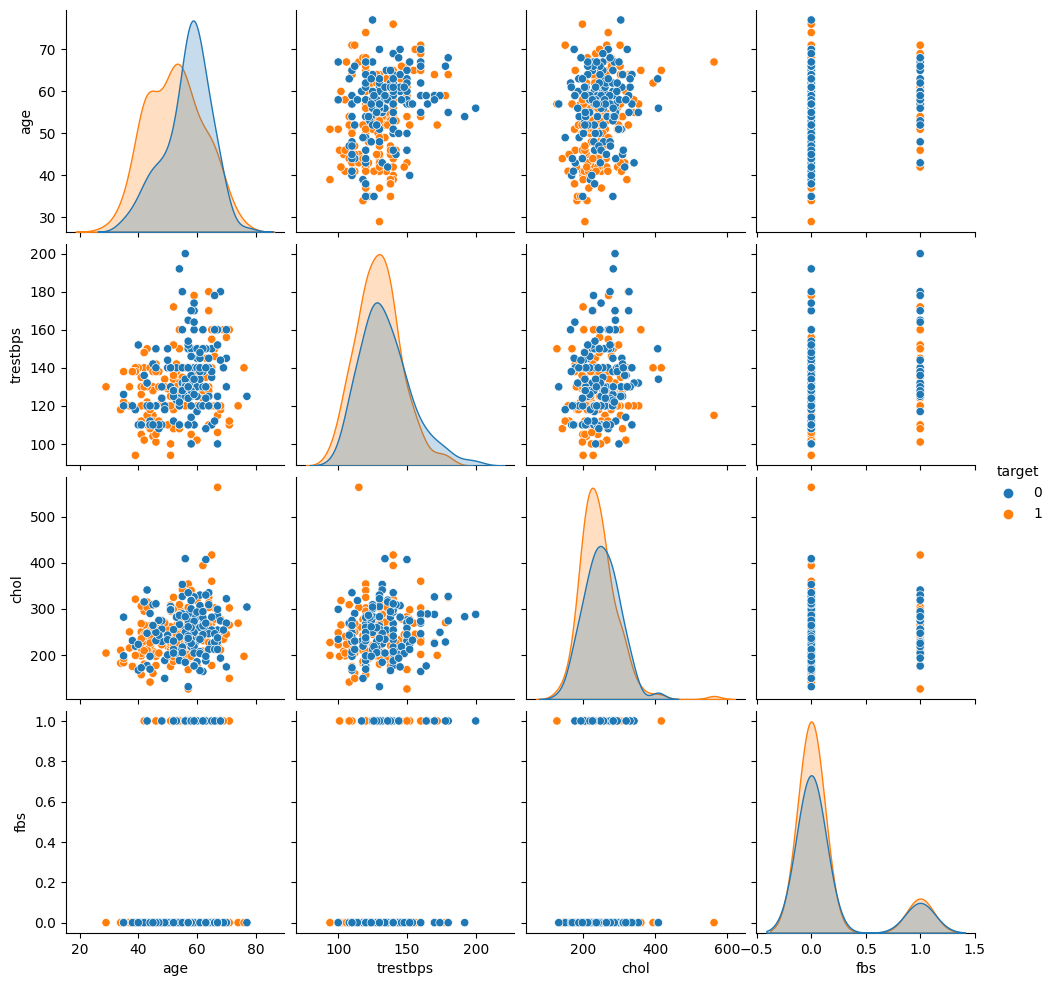

In [104]:
### 전체 dataset의 산점도

ndf = df[['age','trestbps','chol','fbs','target']]
sns.pairplot(ndf, hue="target");
plt.show()

In [105]:
# Train test split

X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# **1. 기본적인 모델**

In [106]:
# model

def model_fn():
    model = Sequential([
    Dense(32, activation = 'relu', input_shape = (X_train.shape[1],)),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
    return model

model = model_fn()

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

historyA = model.fit(X_train, y_train, epochs=30, validation_data = (X_test, y_test))

Epoch 1/30
8/8 [==============================] - 1s 25ms/step - loss: 0.6256 - accuracy: 0.7190 - val_loss: 0.6307 - val_accuracy: 0.6721
Epoch 2/30
8/8 [==============================] - 0s 8ms/step - loss: 0.5845 - accuracy: 0.7934 - val_loss: 0.6013 - val_accuracy: 0.7049
Epoch 3/30
8/8 [==============================] - 0s 10ms/step - loss: 0.5494 - accuracy: 0.8306 - val_loss: 0.5743 - val_accuracy: 0.7377
Epoch 4/30
8/8 [==============================] - 0s 10ms/step - loss: 0.5166 - accuracy: 0.8388 - val_loss: 0.5471 - val_accuracy: 0.7377
Epoch 5/30
8/8 [==============================] - 0s 9ms/step - loss: 0.4863 - accuracy: 0.8306 - val_loss: 0.5187 - val_accuracy: 0.7541
Epoch 6/30
8/8 [==============================] - 0s 9ms/step - loss: 0.4565 - accuracy: 0.8430 - val_loss: 0.4938 - val_accuracy: 0.7541
Epoch 7/30
8/8 [==============================] - 0s 10ms/step - loss: 0.4318 - accuracy: 0.8512 - val_loss: 0.4695 - val_accuracy: 0.7869
Epoch 8/30
8/8 [==============

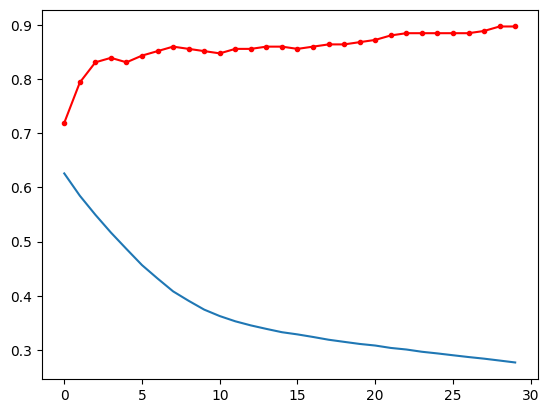

In [107]:
y_loss = historyA.history['loss']
y_accu = historyA.history['accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len,y_loss)
plt.plot(x_len,y_accu, marker='.', c="red")

plt.show()

# **2. Validation set을 사용하여 과적합 확인**

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random

def model_fn():
    model = Sequential([
    Dense(32, activation = 'relu', input_shape = (X_train.shape[1],)),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
    return model

model = model_fn()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])  # 딥러닝 모델을 실행합니다.

history=model.fit(X_train, y_train, validation_split=0.25, epochs=70, batch_size=16, verbose=1)


Epoch 1/70
12/12 [==============================] - 2s 28ms/step - loss: 0.6650 - binary_accuracy: 0.5691 - val_loss: 0.6296 - val_binary_accuracy: 0.7377
Epoch 2/70
12/12 [==============================] - 0s 9ms/step - loss: 0.5860 - binary_accuracy: 0.7735 - val_loss: 0.5635 - val_binary_accuracy: 0.8033
Epoch 3/70
12/12 [==============================] - 0s 10ms/step - loss: 0.5287 - binary_accuracy: 0.8066 - val_loss: 0.5126 - val_binary_accuracy: 0.7869
Epoch 4/70
12/12 [==============================] - 0s 11ms/step - loss: 0.4825 - binary_accuracy: 0.8287 - val_loss: 0.4766 - val_binary_accuracy: 0.8197
Epoch 5/70
12/12 [==============================] - 0s 10ms/step - loss: 0.4475 - binary_accuracy: 0.8287 - val_loss: 0.4497 - val_binary_accuracy: 0.8361
Epoch 6/70
12/12 [==============================] - 0s 7ms/step - loss: 0.4186 - binary_accuracy: 0.8343 - val_loss: 0.4281 - val_binary_accuracy: 0.8361
Epoch 7/70
12/12 [==============================] - 0s 8ms/step - loss: 

**Early Stopping을 위해서**

**from tensorflow.keras.callback inport ModelCheckpint, EarlyStopping**

**를 사용한다.**

In [109]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.3463 - binary_accuracy: 0.8689


[0.3463035821914673, 0.868852436542511]